# About the project

In this project, we will practice using the pandas plotting functionality to explore data quickly with visualizations. We will be working with a dataset on the job outcomes of students who graduated from colledge between 2010 and 2012. The original data was released by American Community Survey, FiveThirtyEight then cleaned the dataset and released it on their Github repo. You can download the dataset [here](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Data attributes:
> - Rank: Rank by median earnings
> - Major_code: Major code
> - Major: Major description
> - Major_category: Category of major
> - Total: Total number of people with major
> - Sample_size: Sample size (unweighted) of full-time
> - Men: Male graduates
> - Women: Female graduates
> - ShareWomen: Women as share of total
> - Employed: Number employed
> - Median: Median salary of full-time, year-round workers
> - Low_wage_jobs: Number in low-wage service jobs
> - Full_time: Number employed 35 hours or more
> - Part_time: Number employed less than 35 hours

Throughout our project, we will go through these questions:
> - Do students in more popular majors make more money? > Using scatter plots
> - How many majors are predominantly male? Predominantly female? > Using histograms
> - Which category of majors have the most students? > Using bar plots

## Import libraries and explore the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
recent_grads = pd.read_csv(r"Desktop\New folder\project5\recent-grads.csv")
print(recent_grads.head(3))
print(recent_grads.tail(3))

   Rank  Major_code                           Major   Total     Men  Women  \
0     1        2419           PETROLEUM ENGINEERING  2339.0  2057.0  282.0   
1     2        2416  MINING AND MINERAL ENGINEERING   756.0   679.0   77.0   
2     3        2415       METALLURGICAL ENGINEERING   856.0   725.0  131.0   

  Major_category  ShareWomen  Sample_size  Employed  ...  Part_time  \
0    Engineering    0.120564           36      1976  ...        270   
1    Engineering    0.101852            7       640  ...        170   
2    Engineering    0.153037            3       648  ...        133   

   Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th   P75th  \
0                  1207          37           0.018381  110000  95000  125000   
1                   388          85           0.117241   75000  55000   90000   
2                   340          16           0.024096   73000  50000  105000   

   College_jobs  Non_college_jobs  Low_wage_jobs  
0          1534           

In [3]:
print(recent_grads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

The dataset has 173 entries, 21 columns. We can notice that there is an entry with null value in columns Total, Men, Women and ShareWomen. Let's see how can we deal with this row.

In [4]:
null_val = recent_grads[recent_grads['Men'].isnull()]
null_val

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


Only one entry with null value (row 21) in our dataset (0.5%). We can either directly drop the nan value, or copy our dataset without null value. To simplify it, I will just drop this value given that it will not affect too much our analysis.

In [5]:
df = recent_grads.dropna()


In [6]:
df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


<AxesSubplot:title={'center':'Employed vs. Sample Size'}, xlabel='Sample_size', ylabel='Employed'>

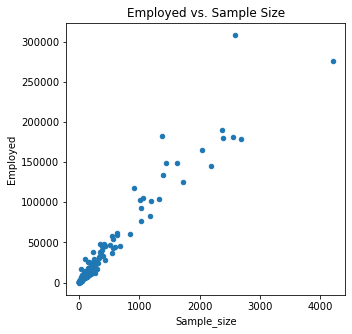

In [7]:
# Do students in more popular majors make more money? > Using scatter plots
df.plot(x = 'Sample_size', y = 'Employed', kind = 'scatter', 
        title = "Employed vs. Sample Size", figsize = (5, 5))

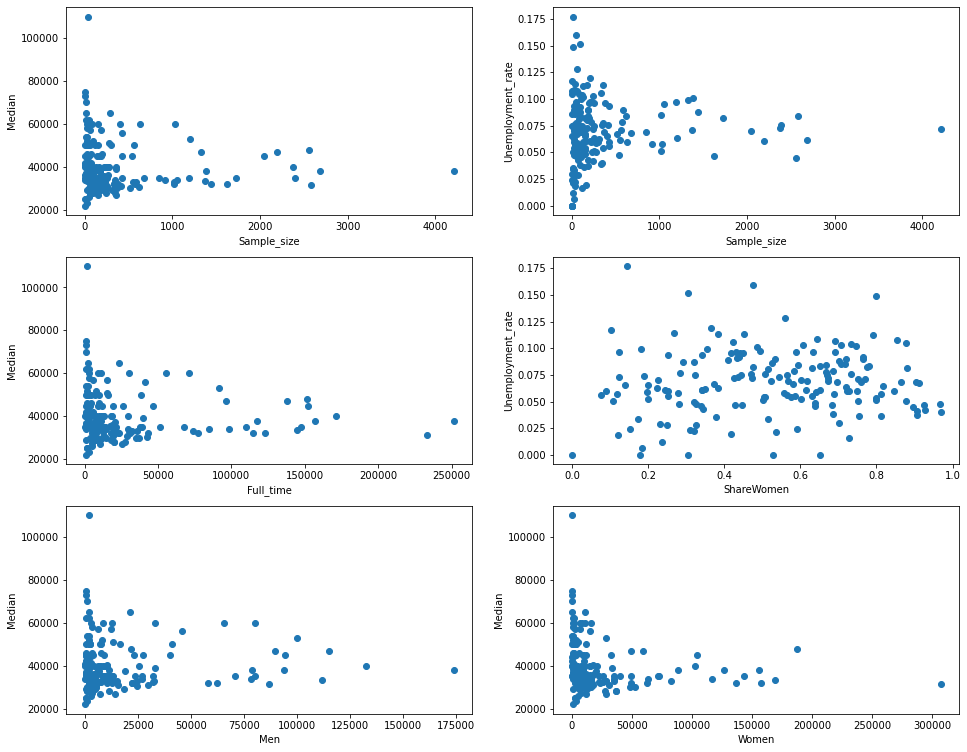

In [8]:
relation_pairs =[['Sample_size', 'Median'], ['Sample_size','Unemployment_rate'],['Full_time','Median'],['ShareWomen','Unemployment_rate'],['Men','Median'],['Women','Median']]

plt.figure(figsize = (16,13))
for i, pair in zip(range(6), relation_pairs):
    ax = plt.subplot(3,2,i+1)
    ax.scatter(df[pair[0]], df[pair[1]])
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])
    

1) Do students in more popular majors make more money?

2) Do students that majored in subjects that were majority female make more money?

3) Is there any link between the number of full-time employees and median salary?


As illustrated in these plots, it's likely that there are no strong correlations between those relation pairs, especially between ShareWoment and Unemployment rate. For the other plots, the range of median salaries varies from 2000 to 8000 for the same number of sample size (between 0 and 500) and number of men/ women (between 0 and 15000). Therefore, We dont have enough evidence to claim that a change in one variable can lead to the change in another, or more specifically, we cant conclude either that students in more popular majors make more money, or that students that majored in subjects that were majority female make more money.

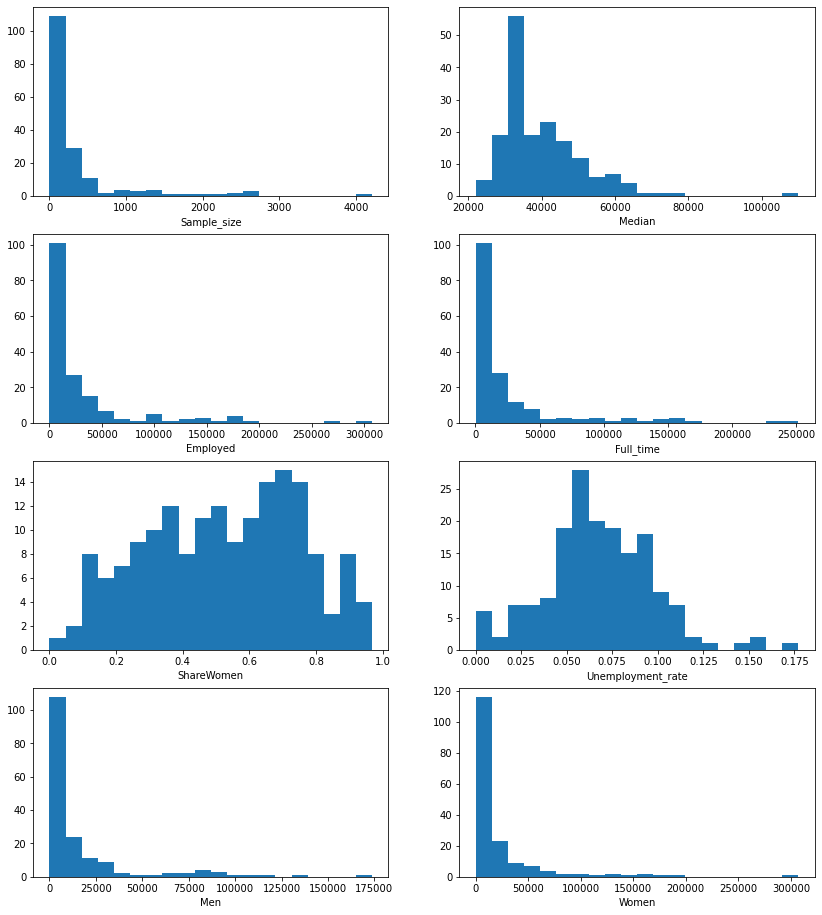

In [9]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen','Unemployment_rate', 'Men', 'Women']

plt.figure(figsize = (14,16))
for i, col in zip(range(len(cols)), cols):
    ax = plt.subplot(4, 2, i+1)
    ax.hist(df[col], bins = 20)
    ax.set_xlabel(col)

### Scatter matrix

In [10]:
from pandas.plotting import scatter_matrix

''

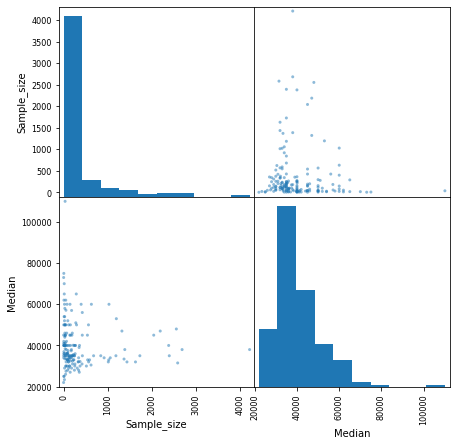

In [11]:
scatter_matrix(df[['Sample_size','Median']], figsize = (7, 7))
;

''

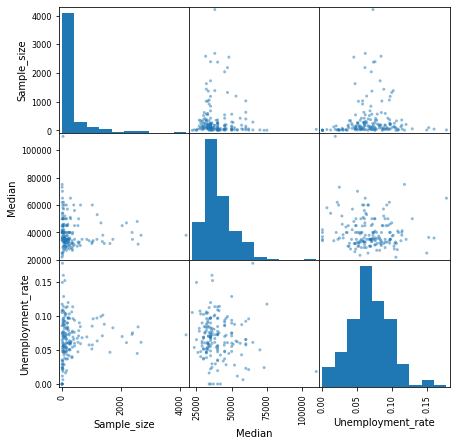

In [12]:
scatter_matrix(df[['Sample_size','Median','Unemployment_rate']], figsize = (7,7))
;

We can notice a slight positive correlation between: sample_size and median, sample_size and unemployment. The sample size and median seemed to be right skewed, while unemployment rate is more normally distributed. 

### Bar plots

In [13]:
label_first = list(df['Major'][:10])
label_last = list(df['Major'][-10:])

''

<Figure size 720x288 with 0 Axes>

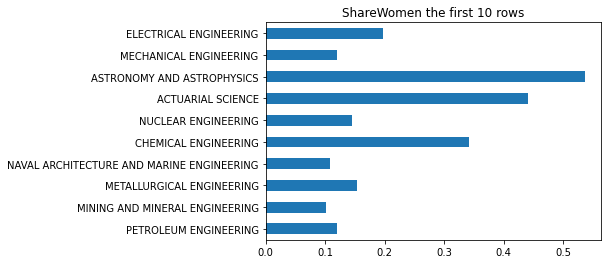

In [14]:
# Compare the percentages of women (ShareWomen) from the first ten rows and last ten rows
# of the dataset
plt.figure(figsize = (10, 4))
fig, ax = plt.subplots()
df['ShareWomen'][:10].plot(kind = 'barh')
ax.set_title("ShareWomen the first 10 rows")
ax.set_yticklabels(label_first)
;


''

<Figure size 720x288 with 0 Axes>

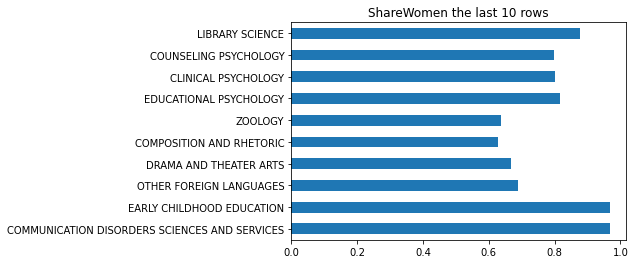

In [15]:
plt.figure(figsize = (10, 4))
fig, ax = plt.subplots()
df['ShareWomen'][-10:].plot(kind = 'barh')
ax.set_title("ShareWomen the last 10 rows")
ax.set_yticklabels(label_last)
;

For the first 10 rows, women seem more interested in Astronomy & Astrophysics and Actuarial Science, while in the last 10 rows, more graduate from Early Childhood education and Communication Disorder Sciences and Services.

''

<Figure size 720x288 with 0 Axes>

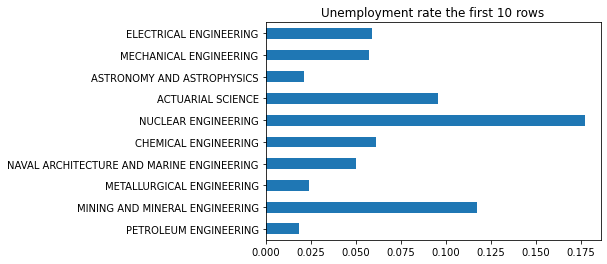

In [16]:
# Compare the unemployment rate (Unemployment_rate) from the first ten rows 
# and last ten rows of the dataset
plt.figure(figsize = (10, 4))
fig, ax = plt.subplots()
df['Unemployment_rate'][:10].plot(kind = 'barh')
ax.set_title("Unemployment rate the first 10 rows")
ax.set_yticklabels(label_first)
;


''

<Figure size 720x288 with 0 Axes>

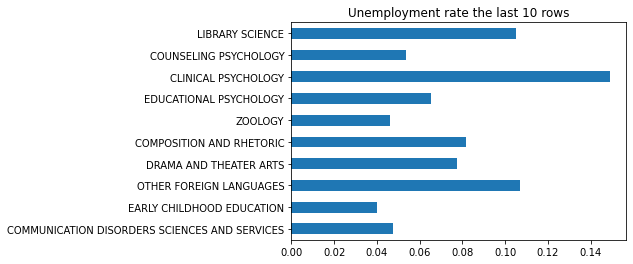

In [17]:
plt.figure(figsize = (10, 4))
fig, ax = plt.subplots()
df['Unemployment_rate'][-10:].plot(kind = 'barh')
ax.set_title("Unemployment rate the last 10 rows")
ax.set_yticklabels(label_last)
;


From the first and last 10 rows of unemployment rate, more students from Nuclear Engineering and Clinical Psychology are unemployed than ones from other majors.

# Conclusion

Through the project, we have been practicing some visualizations libraries to answer the basic questions about our dataset. Scatter plot is used to find correlation between variables, combined with histogram in scatter matrix to find info about distribution of data. To analysis categorical variables, bar chart is a better option.